In [148]:
import statsmodels.formula.api as sm
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import os

# Preparing Dataframes for combination table

In [6]:
population = pd.read_csv('./population_totals.csv')

In [7]:
homeless = pd.read_csv('./homelessness_totals.csv')

In [9]:
rent = pd.read_csv('./avg_rent_2008-2022.csv')

In [12]:
income = pd.read_csv('./average_income.csv')

In [10]:
tax = pd.read_csv('./corporation_tax_all_years.csv')

In [72]:
y_a = pd.read_csv('./young_adults_living_at_home.csv')

In [26]:
rent

,year,number of bedrooms,property type,location,unit,price
0,2008,All bedrooms,All property types,Dublin,Euro,1270
1,2008,All bedrooms,All property types,"Balbriggan, Dublin",Euro,1033
2,2008,All bedrooms,All property types,"Blackrock, Dublin",Euro,1586
3,2008,All bedrooms,All property types,"Booterstown, Dublin",Euro,1657
4,2008,All bedrooms,All property types,"Dalkey, Dublin",Euro,1655
...,...,...,...,...,...,...
39476,2022,Four plus bed,Terrace house,"Ballsbridge, Dublin 4",Euro,3928
39477,2022,Four plus bed,Terrace house,"Ranelagh, Dublin 6",Euro,3862
39478,2022,Four plus bed,Terrace house,"Rathmines, Dublin 6",Euro,3179
39479,2022,Four plus bed,Apartment,Dublin,Euro,2596


In [35]:
rent_grouped = rent.groupby(['year', 'location'])[['price']].mean()
rent_grouped

price
year location                              
2008 Artane, Dublin 5           1317.062500
     Ashtown, Dublin 15         1226.181818
     Aungier Street, Dublin 2   1166.166667
     Balbriggan, Dublin         1018.590909
     Baldoyle, Dublin 13        1326.538462
...                                     ...
2022 Templeogue, Dublin 6W      2123.833333
     Terenure, Dublin 6W        1916.434783
     Townsend Street, Dublin 2  1806.800000
     Walkinstown, Dublin 12     1705.428571
     Whitehall, Dublin 9        1668.615385

[2371 rows x 1 columns]

In [36]:
rent_grouped.reset_index(inplace=True)

In [39]:
rent_yearly = rent_grouped.groupby('year')[['price']].median().round(2)

In [48]:
rent_yearly.rename(columns={'price':'average rent'}, inplace=True)

In [41]:
income.rename(columns={'time':'year'}, inplace=True)

In [47]:
income.rename(columns={'value':'average income'}, inplace=True)

In [78]:
population.rename(columns={'value':'population total'}, inplace=True)

,year,age group,population total
0,2002,All ages,3917203
1,2006,All ages,4239848
2,2011,All ages,4588252
3,2016,All ages,4761865
4,2022,All ages,5149139
5,2019,All ages,4921496
6,2020,All ages,4977443
7,2021,All ages,5011460


In [52]:
homeless.rename(columns={'total adults':'total homeless adults'}, inplace=True)

In [55]:
y_a = y_a[y_a['country'] == 'IE']

In [62]:
y_a = y_a[y_a['sex'] == 'T']

In [65]:
y_a.to_csv('./young_adults_living_at_home.csv')

In [101]:
y_a.rename(columns={'percentage':'percentage y/a living at home'}, inplace=True)

In [66]:
y_a['age'].unique()

array(['Y16-19', 'Y16-24', 'Y16-29', 'Y18-24', 'Y18-34', 'Y20-24',
       'Y20-29', 'Y25-29', 'Y25-34'], dtype=object)

In [73]:
y_a = y_a[(y_a['age'] =='Y20-24')|(y_a['age'] =='Y25-34')]

In [76]:
y_a = y_a.groupby('time_period')[['percentage']].mean()

In [98]:
y_a.rename(columns={'time_period':'year'}, inplace=True)

# Combining the Dataframes

In [79]:
pop_homeless = population.merge(homeless, how='left', on='year')

In [87]:
pop_homeless_rent = pop_homeless.merge(rent_yearly, how='left', on='year')

In [89]:
pop_homeless_rent_income = pop_homeless_rent.merge(income, how='left', on='year')

In [91]:
pop_homeless_rent_income_tax = pop_homeless_rent_income.merge(tax, how='left', on='year')

In [132]:
pop_homeless_rent_income_tax_y_a = pop_homeless_rent_income_tax.merge(y_a, how='left', on='year')

In [139]:
pop_homeless_rent_income_tax_y_a#.pop('age group')

,year,population total,total homeless adults,average rent,average income,total corporation tax revenue,percentage y/a living at home
0,2002,3917203,NaN,NaN,31144,4803.75,NaN
1,2006,4239848,NaN,NaN,38297,6684.61,50.35
2,2011,4588252,NaN,966.54,42870,3751.38,47.55
3,2016,4761865,NaN,1316.35,43741,7351.71,55.75
4,2022,5149139,7438.5,1781.10,52971,NaN,66.35
5,2019,4921496,6489.5,1635.82,47879,10887.30,56.65
6,2020,4977443,6129.0,1680.08,49192,11952.78,61.20
7,2021,5011460,6018.0,1719.40,50665,15323.12,65.15


In [140]:
corr_table = pop_homeless_rent_income_tax_y_a

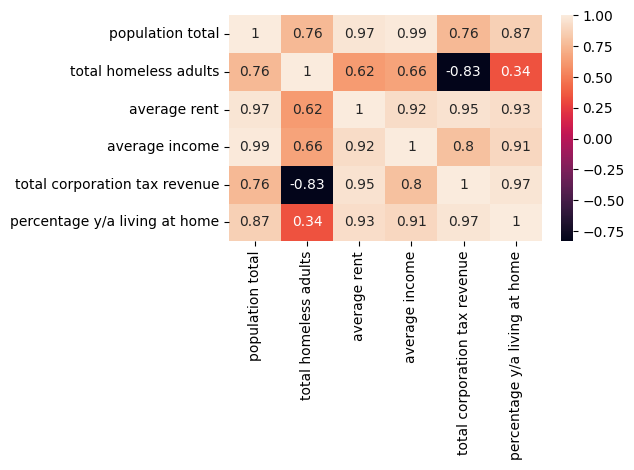

In [126]:
case_factors = sns.heatmap(corr_table.corr(), annot=True);
plt.tight_layout()

In [145]:
fig = case_factors.get_figure()
fig.savefig("project_correlations.png") 

In [143]:
corr_long = pd.melt(corr_table, id_vars='year', value_vars=['population total', 
                                                'total homeless adults', 
                                                'average rent', 
                                                'average income', 
                                                'total corporation tax revenue', 
                                                'percentage y/a living at home'], var_name='measure', value_name='value', ignore_index=True)

In [144]:
corr_long.to_csv('./correlations_long.csv')

In [141]:
corr_table.to_csv('./correlations.csv')